In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
from tensorflow import keras

# Using the Sequential API

## Classification

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
X_train_full.dtype

dtype('uint8')

In [5]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [6]:
class_names=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle", "boot"]

In [7]:
class_names[y_train[0]]

'Coat'

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.layers

In [11]:
weights, biases =model.layers[1].get_weights()

In [12]:
print(f"Weights shape: {weights.shape}" )
print(f"Biases shape: {biases.shape}" )

Weights shape: (784, 300)
Biases shape: (300,)


In [13]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [14]:
history=model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7290 - accuracy: 0.7573 - val_loss: 0.5400 - val_accuracy: 0.8120
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4897 - accuracy: 0.8279 - val_loss: 0.4605 - val_accuracy: 0.8432
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4453 - accuracy: 0.8442 - val_loss: 0.4126 - val_accuracy: 0.8618
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4173 - accuracy: 0.8537 - val_loss: 0.3953 - val_accuracy: 0.8684
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3961 - accuracy: 0.8615 - val_loss: 0.3802 - val_accuracy: 0.8694
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3799 - accuracy: 0.8672 - val_loss: 0.3813 - val_accuracy: 0.8656
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3660 - accuracy: 0.8712 - val_loss: 0.3691 - val_accuracy:

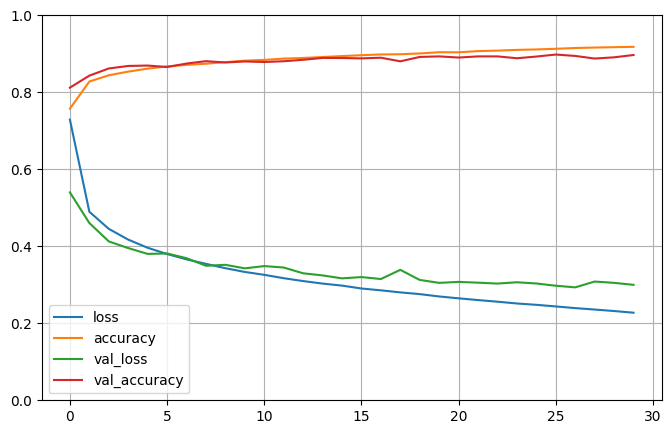

In [15]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) #set the vertical range to [0-1]
plt.show()

In [16]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 72.1428 - accuracy: 0.8319


[72.1427993774414, 0.8319000005722046]

In [17]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 117ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [18]:
y_pred = np.argmax(y_proba, axis=1)
y_pred

array([9, 2, 1])

In [19]:
np.array(class_names)[y_pred]


array(['Ankle', 'Pullover', 'Trouser'], dtype='<U11')

In [20]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

## Regression

In [21]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [22]:
housing = fetch_california_housing()

In [23]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [24]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.9383 - val_loss: 2.5179
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 2.3695 - val_loss: 0.5904
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5211 - val_loss: 0.4652
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4577 - val_loss: 0.4518
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4366 - val_loss: 0.4313
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4226 - val_loss: 0.4199
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4119 - val_loss: 0.4109
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4249 - val_loss: 0.4101
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4041 - val_loss: 0.3985
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4000 - val_loss: 0.4003

# Using the Functional API to build complex models

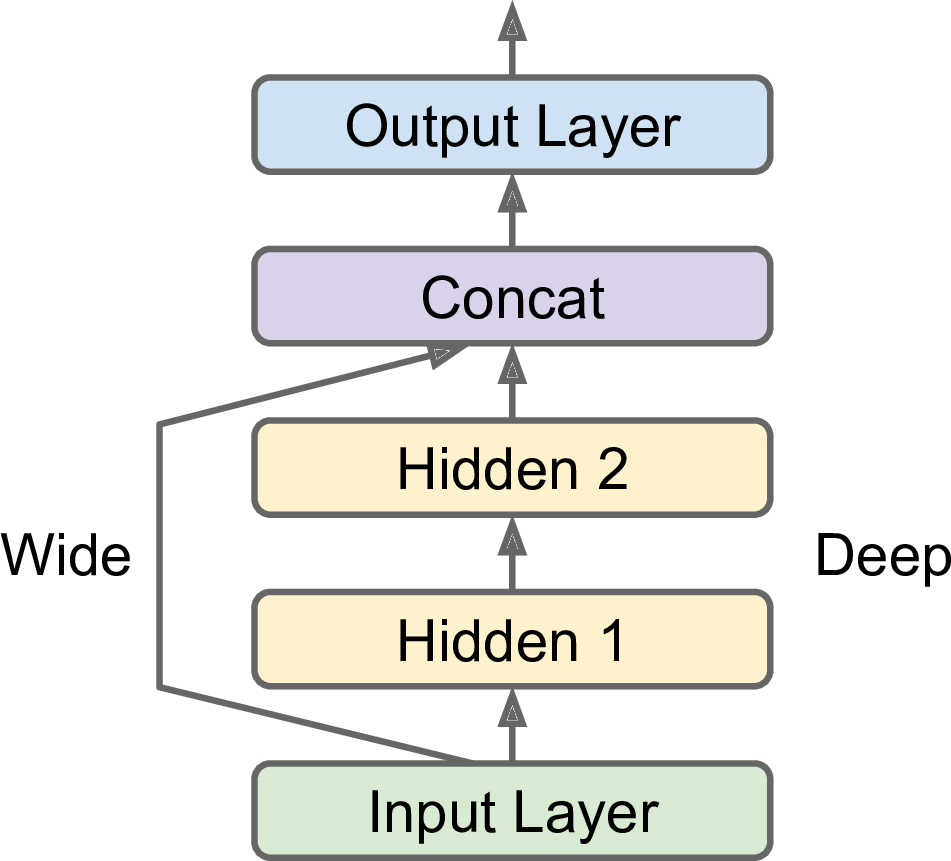


In [25]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

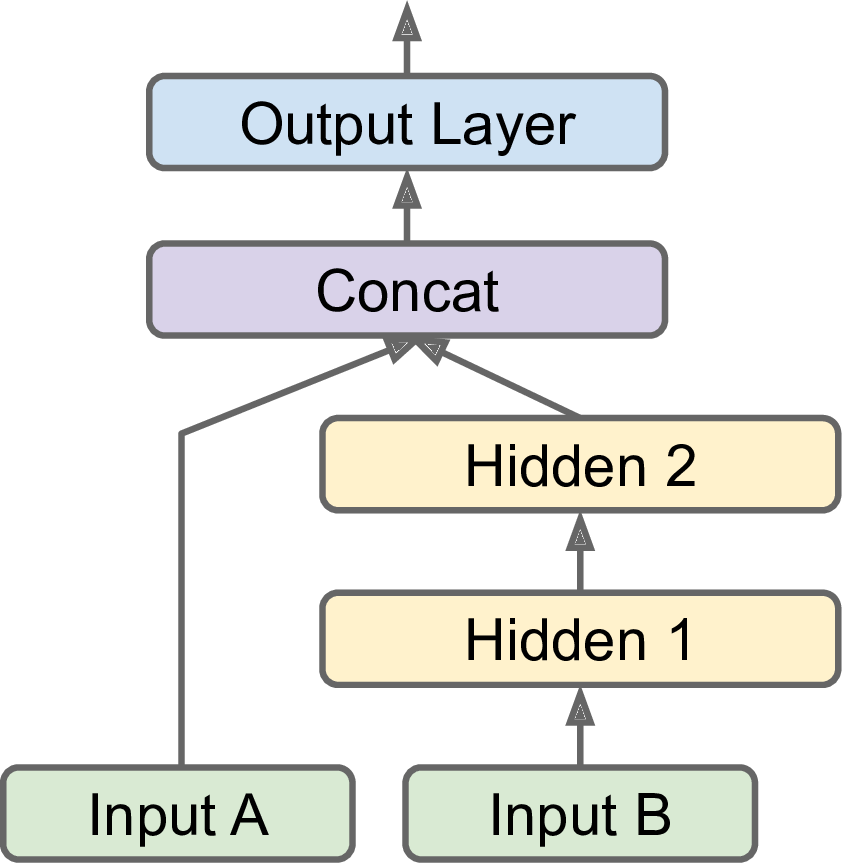

In [26]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [27]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 0.9416 - val_loss: 0.8664
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8868 - val_loss: 0.8103
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7941 - val_loss: 0.5057
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4941 - val_loss: 0.4670
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4650 - val_loss: 0.4444
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4498 - val_loss: 0.4303
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4367 - val_loss: 0.4279
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4230 - val_loss: 0.4037
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4178 - val_loss: 0.4029
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4039 - val_loss: 0.3865

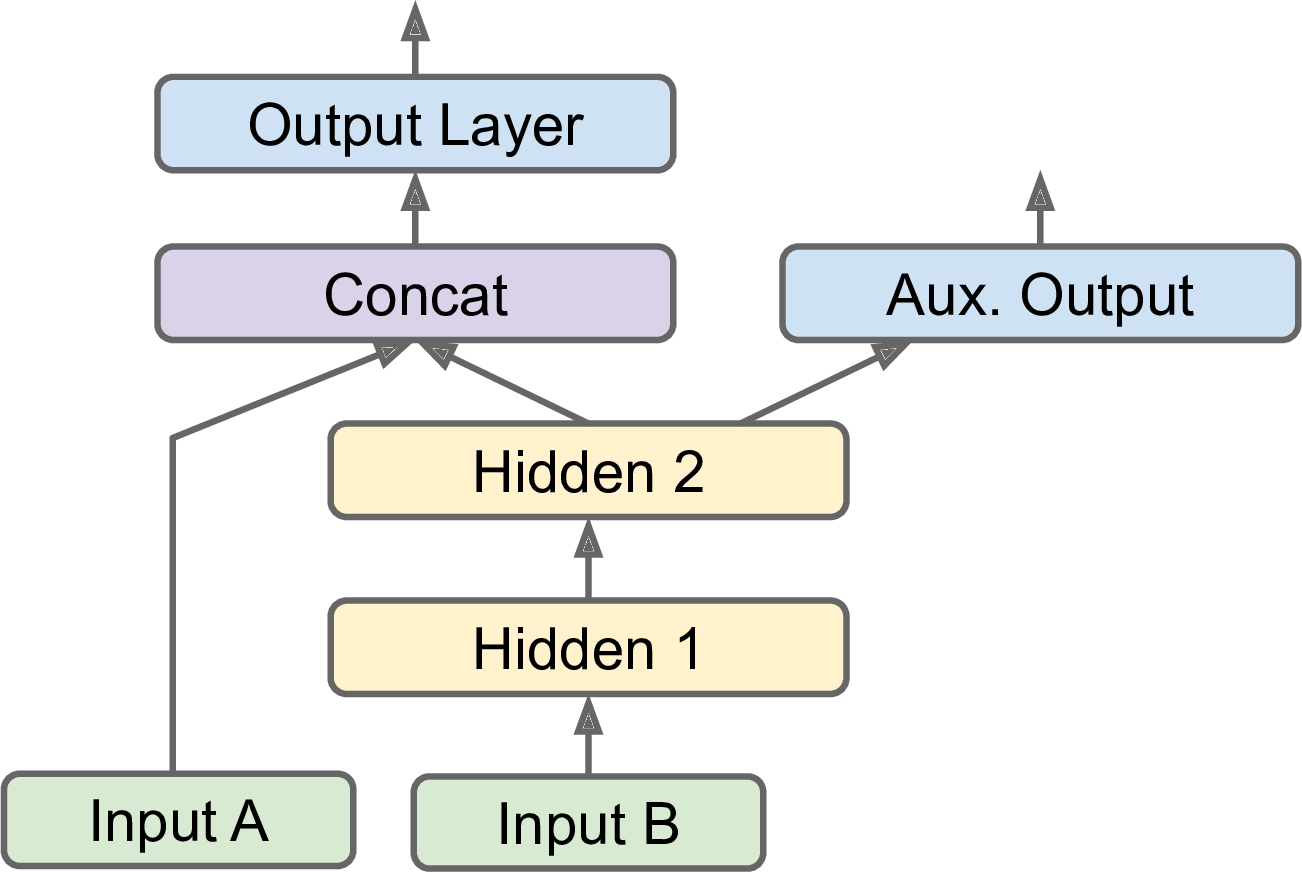

In [28]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

In [29]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")
history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train], epochs=20,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 1.0997 - main_output_loss: 0.9799 - aux_output_loss: 2.1780 - val_loss: 2.6205 - val_main_output_loss: 2.7755 - val_aux_output_loss: 1.2255
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 1.6601 - main_output_loss: 1.7251 - aux_output_loss: 1.0751 - val_loss: 1.4705 - val_main_output_loss: 1.3768 - val_aux_output_loss: 2.3144
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 1.4352 - main_output_loss: 1.3764 - aux_output_loss: 1.9640 - val_loss: 0.5705 - val_main_output_loss: 0.5269 - val_aux_output_loss: 0.9627
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5457 - main_output_loss: 0.5034 - aux_output_loss: 0.9257 - val_loss: 0.5246 - val_main_output_loss: 0.4879 - val_aux_output_loss: 0.8541
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5007 - main_output_loss: 0.4635 - aux_output_loss: 0.8357 - val_loss

# Using the Subclassing API to Build Dynamic Models

In [30]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) # handles standard args (e.g., name)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model_subclassing = WideAndDeepModel()

## Savind and Restoring a Model

In [31]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")

In [32]:
model.save("my_keras_model.h5")

In [33]:
model = keras.models.load_model("my_keras_model.h5")

# Using Callbacks

In [34]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.2243
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 41.1760
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: nan
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: nan
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: nan
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: nan
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: nan
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: nan
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: nan
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: nan


## Implementing Early Stopping

In [35]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",
                                                save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # roll back to best model

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 7/10
363/363 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 10/10
363/363 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan


In [36]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan


### Custom Callback

In [37]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

# Using TensorBoard for Visualization

In [38]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir() # e.g., './my_logs/run_2019_06_07-15_15_22'

In [39]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 4/30
363/363 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 7/30
363/363 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 8/30
363/363 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 9/30
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 10/30
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 11/30
363/363 [==============================] - 1s 2

In [40]:
%reload_ext tensorboard
%tensorboard --logdir=./my_logs --port=6066

In [41]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        data = (np.random.randn(100) + 2) * step / 100 # some random data
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        images = np.random.rand(2, 32, 32, 3) # random 32×32 RGB images
        tf.summary.image("my_images", images * step / 1000, step=step)
        texts = ["The step is " + str(step), "Its square is " + str(step**2)]
        tf.summary.text("my_text", texts, step=step)
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)